# Module One Partner Project: Andy Luc and Connor Anderson 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [131]:
df = pd.read_csv('kc_house_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [132]:
df.head().T

0           1           2           3           4
id             7129300520  6414100192  5631500400  2487200875  1954400510
date           10/13/2014   12/9/2014   2/25/2015   12/9/2014   2/18/2015
price              221900      538000      180000      604000      510000
bedrooms                3           3           2           4           3
bathrooms               1        2.25           1           3           2
sqft_living          1180        2570         770        1960        1680
sqft_lot             5650        7242       10000        5000        8080
floors                  1           2           1           1           1
waterfront            NaN           0           0           0           0
view                    0           0           0           0           0
condition               3           3           3           5           3
grade                   7           7           6           7           8
sqft_above           1180        2170         770        1050        1680
sqft_basement         0.0       400.0         0.0       910.0         0.0
yr_built             1955        1951        1933        1965        1987
yr_renovated            0        1991         NaN           0           0
zipcode             98178       98125       98028       98136       98074
lat               47.5112      47.721     47.7379     47.5208     47.6168
long             -122.257    -122.319    -122.233    -122.393    -122.045
sqft_living15        1340        1690        2720        1360        1800
sqft_lot15           5650        7639        8062        5000        7503

Drop all records in DF where values in Waterfront are NaN.

In [133]:
df = df[~np.isnan(df['waterfront'])]
df = df[~np.isnan(df['view'])]
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192  12/9/2014   538000.0         3       2.25         2570   
2  5631500400  2/25/2015   180000.0         2       1.00          770   
3  2487200875  12/9/2014   604000.0         4       3.00         1960   
4  1954400510  2/18/2015   510000.0         3       2.00         1680   
5  7237550310  5/12/2014  1230000.0         4       4.50         5420   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   
5    101930     1.0         0.0   0.0     ...         11        3890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   

   sqft_living15  sqft_lot15  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  

[5 rows x 21 columns]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
id               19164 non-null int64
date             19164 non-null object
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null object
yr_built         19164 non-null int64
yr_renovated     15762 non-null float64
zipcode          19164 non-null int64
lat              19164 non-null float64
long             19164 non-null float64
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.2+ MB


# OLS Model 

In [135]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [136]:
f = 'price~ bedrooms'

In [137]:
model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2024.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:15:46   Log-Likelihood:            -2.7198e+05
No. Observations:               19164   AIC:                         5.440e+05
Df Residuals:                   19162   BIC:                         5.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.249e+05   9603.499     13.009      0.0

In [138]:
model.params

Intercept    124928.846957
bedrooms     123433.405361
dtype: float64

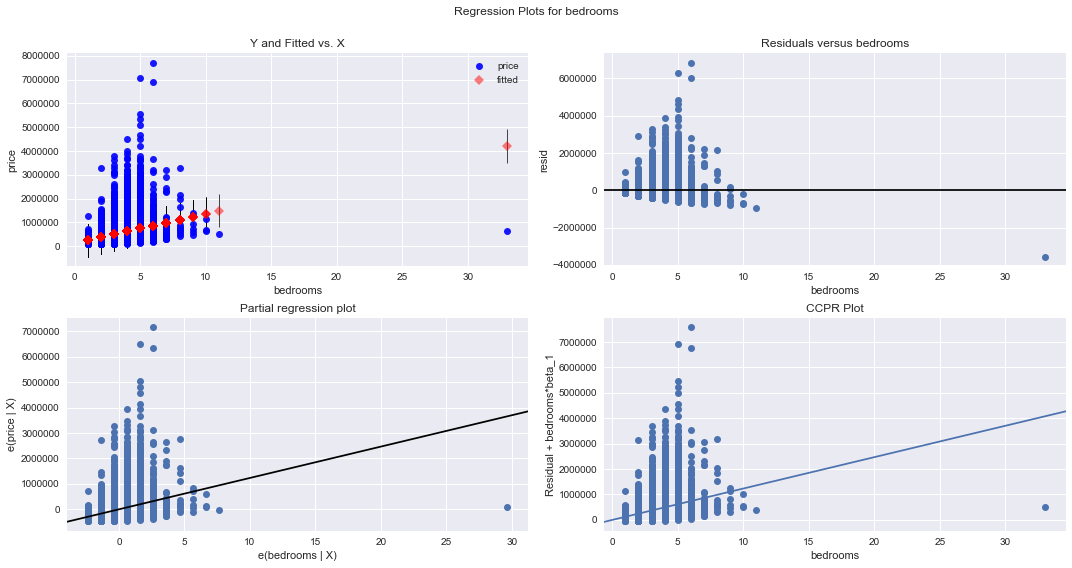

In [139]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'bedrooms', fig=fig)

# Visualization

Pairplot of Sqft Living, Bedrooms, Bathrooms in relation to Price.

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


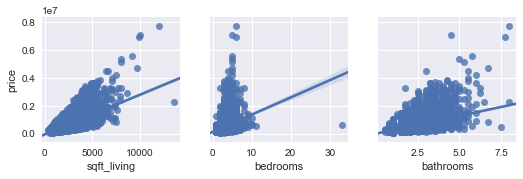

In [140]:
sns.pairplot(df,x_vars=['sqft_living','bedrooms','bathrooms'], y_vars='price', kind='reg')

## MODEL 1
Sqft Living, Bedrooms, Bathrooms vs Price. All of these factors are attributes of the house, and may increase or decrease price depending on whether they increase or decrease.

RMSE = 267,760

In [141]:
import sklearn

In [142]:
feature_cols = ['sqft_living','sqft_lot','bathrooms']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

-42322.48338300828
[ 2.90495337e+02 -2.86228224e-01 -7.13191704e+03]


In [143]:
y_pred = linreg.predict(X_test)

In [144]:
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

176013.27262312276
69966046160.14987
264510.9565975479


In [145]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192  12/9/2014   538000.0         3       2.25         2570   
2  5631500400  2/25/2015   180000.0         2       1.00          770   
3  2487200875  12/9/2014   604000.0         4       3.00         1960   
4  1954400510  2/18/2015   510000.0         3       2.00         1680   
5  7237550310  5/12/2014  1230000.0         4       4.50         5420   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   
5    101930     1.0         0.0   0.0     ...         11        3890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   

   sqft_living15  sqft_lot15  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  

[5 rows x 21 columns]

## MODEL 2
SqFt Living 15, Sqft Loft 15, Grade vs Price: These factors were selected to see if there was a correlation between quality of neighborhood vs the price of home. 

RMSE = 268,447

In [146]:
feature_cols = ['sqft_living15','sqft_lot15','grade']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

-985133.6928682199
[ 1.09986678e+02 -2.49103302e-01  1.71228407e+05]


In [147]:
y_pred = linreg.predict(X_test)

In [148]:
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

170436.326539529
63210953818.230576
251417.88683033388


## Model 3
Sqft vs Price

RMSE = 272,526

In [149]:
feature_cols = ['sqft_living']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)



-50341.2464335151
[283.12105935]


In [150]:
"""PREDICTION OF Y"""
y_pred = linreg.predict(X_test)

In [151]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

177594.38338253807
70250384091.18755
265047.8901843732


## Model 4 
Grade vs Price

RMSE: 275,061


In [152]:
feature_cols = ['grade']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

-1083065.3061072377
[212039.96821011]


In [153]:
"""PREDICTION OF Y"""
y_pred = linreg.predict(X_test)

In [154]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

177198.78697858826
69897934030.4908
264382.1741920033


# Model 5
Year Built and SQFT Living in relation to Price.

RMSE: 239,004

In [155]:
feature_cols = ['yr_built', 'sqft_living' ]
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

4688286.962807573
[-2434.00545811   312.51712318]


In [156]:
"""PREDICTION OF Y"""
y_pred = linreg.predict(X_test)

In [157]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

171212.68572995192
64921094610.310715
254796.18248771058


# Model 6
Year Built, Condition, SQFT Living in relation to Price.

RMSE: 

In [158]:
feature_cols = ['yr_built', 'sqft_living', 'view' ]
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

3712234.571741288
[-1913.31452565   278.04625318 94466.25624786]


In [159]:
"""PREDICTION OF Y"""
y_pred = linreg.predict(X_test)

In [160]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

163054.41366909273
63699177996.76693
252386.96082953044


# Model 7
SQFT Lving vs SQFT Living15 vs Price

In [190]:
feature_cols = ['sqft_living15', 'sqft_living', 'view', 'waterfront', 'condition', 'bathrooms']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

-223259.24686481652
[5.24375104e+01 2.40017006e+02 7.17114372e+04 6.32156816e+05
 4.12230690e+04 1.01032227e+03]


In [191]:
"""PREDICTION OF Y"""
y_pred = linreg.predict(X_test)

In [192]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

161627.66052483028
51016011690.46817
225867.24350925296


# Model Comparison Graph

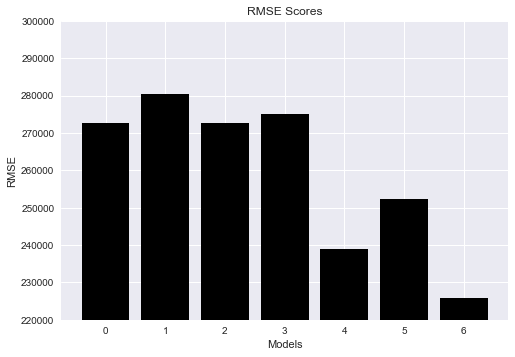

In [193]:
Values ={'Model 1': 272526.5175180645, 'Model 2': 280403.1883537865, 
         'Model 3': 272526.5175180645, 'Model 4': 275061.1093215885, 
         'Model 5': 239004.38679856234, 'Model 6': 252386.96082953044,
        'Model 7': 225867.24350925296}
"""Model 7 is overfit"""
#plt.scatter(Values['key'], Values['value'])

# for key in comp:

#     plt.bar([key]*8, comp[key], label=key)

# plt.legend()
# plt.show()

plt.bar(range(len(Values)), list(Values.values()), color = ('Black'))
plt.ylim(220000,300000)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Scores')
plt.show()









